[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-02-store-input)

## 상가(상권)정보 분석하기
* 데이터 출처 : [공공데이터포털](https://www.data.go.kr/dataset/15012005/fileData.do)
* 소상공인 상권정보 상가업소 데이터
* 영상에 사용한 데이터셋 다운로드 : http://bit.ly/open-data-set-folder

### 데이터셋을 엑셀에서 열어보는 방법

```
MS엑셀(Excel)에서 UTF-8로 된 CSV파일 불러오기 
 ◦  기존 euc-kr 데이터 추출형식으로 인해 업소명 오류가 발견되었으며 이를 개선하고자 UTF-8 형식으로 추출하였습니다.
 ◦ 개발자가 아닌 일반사용자의 경우 euc-kr(UTF-8 이나 UTF-16)이 아닌 CSV파일을 엑셀에서 바로 열면 한글이 모두 깨지게 됩니다.
 
 ◦ 바로 열지 마시고 다음 절차를 거치시기 바랍니다. 
   - 엑셀을 실행하고 데이터 → 텍스트를 선택합니다.
   - 가져올 파일을 선택하고 확인을 클릭합니다.
   - 콤보 박스에서 적절한 코드 타입이 선택됐는지 확인합니다. 
     * UTF-8의 코드 페이지 넘버는 65001입니다.
 
   - 원본 데이터 파일 유형을 ‘구분 기호로 분리됨’ 선택합니다. 
   - 기타 ‘|’(파이프) 입력, 3단계 텍스트로 선택합니다.  
     * 단, 지번코드, 건물관리번호, 신우편번호, 경도, 위도 등 행마다 텍스트 선택   
  
``` 

### 데이터셋 분류 지역
* 이 튜토리얼에서는 1번 파일만 사용합니다.

```
※ 파일데이터 분류 지역 
1 : 서울, 부산
2 : 대구, 인천, 광주, 대전, 울산
3 : 경기, 강원, 충북
4 : 충남, 전북, 전남, 경북, 경남, 제주
```

## 라이브러리 로드

In [1]:
# 라이브러리를 로드합니다.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 한글폰트 설정

In [2]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

### 한글폰트 설정 확인

<AxesSubplot:title={'center':'한글폰트 설정'}>

C:\Users\diqqo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\diqqo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


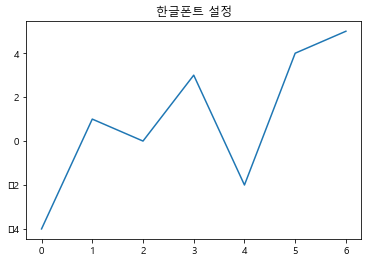

In [3]:
# 한글폰트를 설정합니다.
pd.Series([-4,1,0,3,-2,4,5]).plot(title="한글폰트 설정")

## 파일로드

In [4]:
# 파일을 로드합니다.
df = pd.read_csv("C:/Users/diqqo/inflearn_study/data/상가업소정보_201912_01.csv", sep="|")

In [5]:
# 모든 컬럼이 표시되도록 max_columns 의 수를 지정합니다.
pd.options.display.max_columns = 39

## 미리보기

### head, tail

In [6]:
# head 로 미리보기를 합니다.
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


In [7]:
# tail 로 미리보기를 합니다.
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
573679,16335150,마이리틀네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11320,도봉구,1132051100,창1동,1132010700,창동,1132010700208120000,1,대지,812,NaN,서울특별시 도봉구 창동 812,113204127109,서울특별시 도봉구 도봉로114길,22,8.0,1132010700108120000018489,현대타운아파트,서울특별시 도봉구 도봉로114길 22-8,132691,1455.0,101,NaN,NaN,127.035145,37.647099


### 인덱스 정보 보기

In [8]:
df.index

RangeIndex(start=0, stop=573680, step=1)

### 컬럼명만 보기

In [9]:
# 컬럼값만 보기
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### info

In [10]:
# info 로 데이터프레임의 정보보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 데이터 타입 보기

In [11]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치 확인하기

In [12]:
n = df.isnull().sum()
n 

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

### 결측치 시각화

<AxesSubplot:>

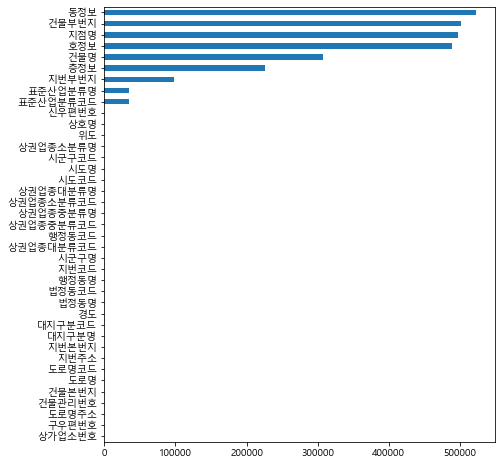

In [13]:
# 막대그래프로 시각화 합니다.
plt.figure(figsize=(7,8))
n.sort_values().plot.barh()

### missingno 로 결측치 시각화 하기
* 별도의 설치가 필요한 라이브러리 입니다. 아나콘다를 설치하게 되면 자주 사용되는 패키지와 라이브러리가 함께 설치 됩니다. 아나콘다를 사용하지 않는다면 이런 라이브러리를 따로 설치하고 의존성있는 버전을 일일이 맞춰주어야 합니다. 아나콘다는 기본적으로 자주 사용되는 판다스, 넘파이, 사이킷런, 맷플롯립 등의 라이브러리를 내장하고 있습니다. 이에 비해 missingno, folium 등의 라이브러리는 아나콘다에 포함되어 있지 않습니다. 그래서 따로 설치를 해서 사용합니다.
* [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


* 아나콘다에서 설치(다음 3가지 중 하나의 명령어를 사용)
    + conda install -c conda-forge missingno
    + conda install -c conda-forge/label/gcc7 missingno
    + conda install -c conda-forge/label/cf201901 missingno

<AxesSubplot:>

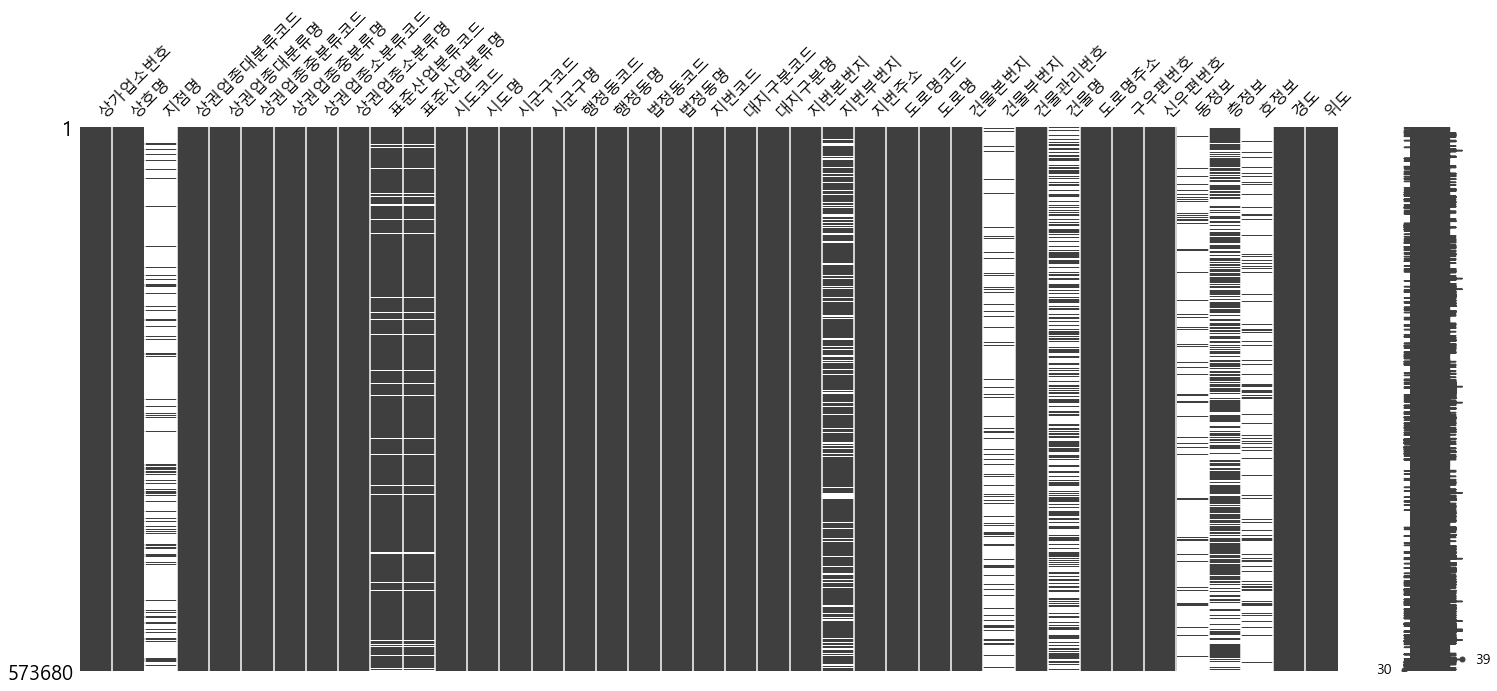

In [14]:
import missingno as msno
msno.matrix(df)

C:\Users\diqqo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\diqqo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

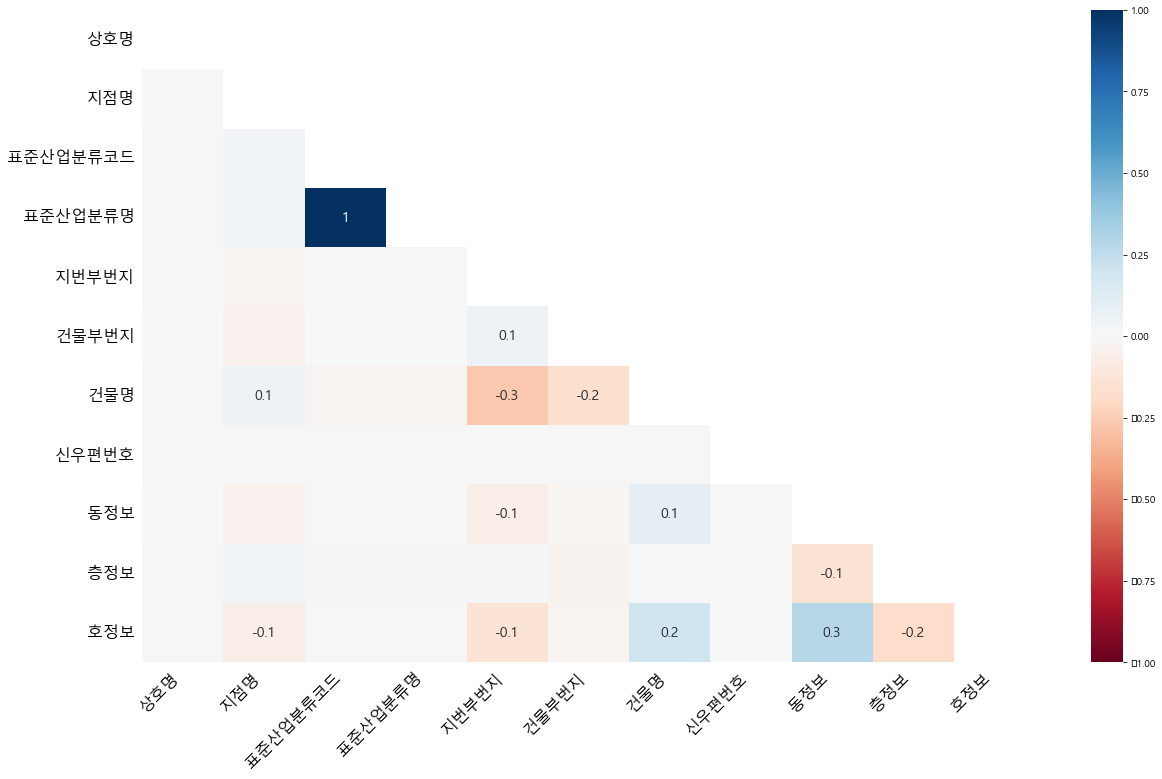

In [15]:
# heatmap 으로 표현합니다.
msno.heatmap(df)

<AxesSubplot:>

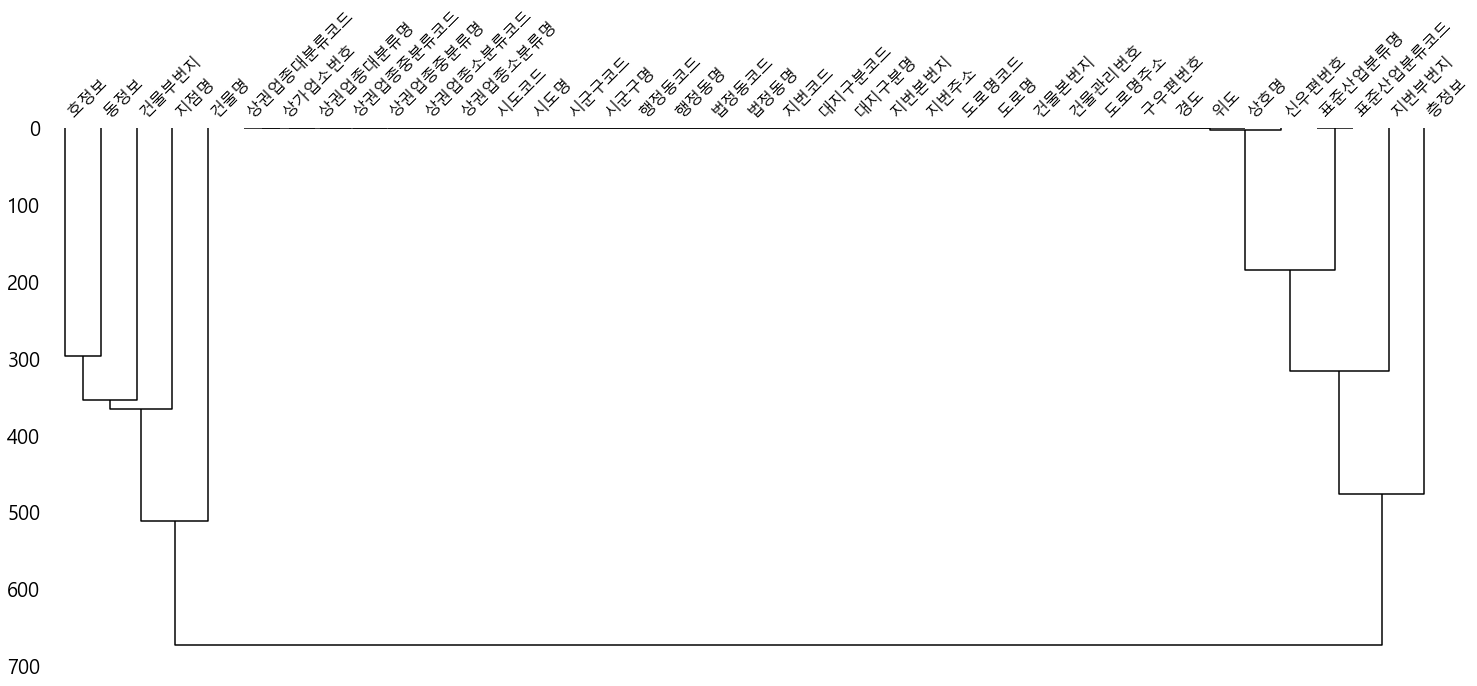

In [16]:
# dendrogram 으로 표현합니다.
msno.dendrogram(df)

## 사용하지 않는 컬럼 제거하기

### 결측치가 너무 많은 컬럼 제거하기

In [17]:
# sort_values 를 통해 결측치가 많은 데이터를 위에서 9개 가져와서 not_use 변수에 담습니다.
# not_use 변수에 담긴 인덱스값만 추출해서 not_use_col 이라는 변수에 담습니다.

not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [18]:
# 사용하지 않는 컬럼을 제거하고 잘 제거가 되었는지 shape 의 수로 확인합니다.
print(df.shape)
df = df.drop(not_use_col, axis=1)
print(df.shape)

(573680, 39)
(573680, 30)


In [19]:
# info()를 통해 해당 컬럼이 제거되었는지 확인하며 메모리 사용량이 줄어들었는지 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   상권업종대분류코드  573680 non-null  object 
 3   상권업종대분류명   573680 non-null  object 
 4   상권업종중분류코드  573680 non-null  object 
 5   상권업종중분류명   573680 non-null  object 
 6   상권업종소분류코드  573680 non-null  object 
 7   상권업종소분류명   573680 non-null  object 
 8   시도코드       573680 non-null  int64  
 9   시도명        573680 non-null  object 
 10  시군구코드      573680 non-null  int64  
 11  시군구명       573680 non-null  object 
 12  행정동코드      573680 non-null  int64  
 13  행정동명       573680 non-null  object 
 14  법정동코드      573680 non-null  int64  
 15  법정동명       573680 non-null  object 
 16  지번코드       573680 non-null  int64  
 17  대지구분코드     573680 non-null  int64  
 18  대지구분명      573680 non-null  object 
 19  지번본번지      573680 non-n

### 사용하지 않는 컬럼 제거하기

In [20]:
# 컬럼명을 전처리 하기 위해 cols 라는 변수에 담습니다.
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [21]:
# 컬럼명에 "코드", "번호"가 있지만 이번 분석에서는 사용하지 않기 때문에 
# 해당되는 컬럼만 찾아와서 cols_code 라는 변수에 담습니다.

cols_code = cols[cols.str.contains("코드|번호")]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [22]:
# "코드", "번호" 가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거합니다.
#  제거 전 후에 shape를 통해 컬럼이 삭제되었는지 확인합니다.
print(df.shape)
df= df.drop(cols_code, axis=1)
print(df.shape)

(573680, 30)
(573680, 16)


In [23]:
# info를 통해 컬럼정보와 메모리 사용량 등을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   대지구분명     573680 non-null  object 
 9   지번본번지     573680 non-null  int64  
 10  지번주소      573680 non-null  object 
 11  도로명       573680 non-null  object 
 12  건물본번지     573680 non-null  int64  
 13  도로명주소     573680 non-null  object 
 14  경도        573680 non-null  float64
 15  위도        573680 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 70.0+ MB


## 행, 열을 기준으로 값을 가져오기

### 열(column)기준 
* df[열이름]
    * 결과가 Pandas 의 Series 형태로 반환
* df[[열목록]] : 2개 이상의 열을 가져올 때는 리스트 형태로 묶어서 지정해주어야 합니다.
    * 결과가 Pandas 의 DataFrame 형태로 반환
    * 1개의 열을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.

In [24]:
# "상호명" 컬럼만 가져옵니다.
df["상호명"]

0                와라와라호프
1         커피빈코리아선릉로93길점
2                  프로포즈
3              싱싱커피&토스트
4              가락사우나내스낵
              ...      
573675          비파티세리공덕
573676            앤탑PC방
573677         오즈아레나PC방
573678           파인트리네일
573679           마이리틀네일
Name: 상호명, Length: 573680, dtype: object

In [25]:
# "상호명", "도로명주소" 2개의 컬럼을 가져옵니다.
df[["상호명","도로명주소"]]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6
3,싱싱커피&토스트,부산광역시 사상구 괘감로 37
4,가락사우나내스낵,서울특별시 송파구 가락로 71
...,...,...
573675,비파티세리공덕,서울특별시 마포구 마포대로14길 4
573676,앤탑PC방,서울특별시 성동구 성수일로8길 37
573677,오즈아레나PC방,서울특별시 강남구 강남대로 492
573678,파인트리네일,서울특별시 영등포구 국제금융로 10


### 행(row) 기준
* df.loc[행]
* df.loc[행, 열]


* df.loc[행이름 혹은 번호]
    * 결과가 Pandas 의 Series 형태로 반환
* df.loc[[행목록]] : 2개 이상의 행을 가져올 때는 열(column)을 가져올 때와 마찬가지로 리스트 형태로 묶어서 지정해주어야 합니다.
    * 결과가 Pandas 의 DataFrame 형태로 반환
    * 1개의 행을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.

In [26]:
# 0 번째 인덱스 행을 가져옵니다.
df.loc[0]

상호명                       와라와라호프
상권업종대분류명                      음식
상권업종중분류명                    유흥주점
상권업종소분류명                   호프/맥주
시도명                        서울특별시
시군구명                         강남구
행정동명                        대치1동
법정동명                         대치동
대지구분명                         대지
지번본번지                        604
지번주소           서울특별시 강남구 대치동 604
도로명              서울특별시 강남구 남부순환로
건물본번지                       2933
도로명주소       서울특별시 강남구 남부순환로 2933
경도                    127.061026
위도                     37.493922
Name: 0, dtype: object

In [27]:
# 0, 1,2 번째 인덱스 행을 가져옵니다.
df.loc[[1,2,3]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,대지,578,부산광역시 사상구 괘법동 578,부산광역시 사상구 괘감로,37,부산광역시 사상구 괘감로 37,128.980455,35.159774


In [28]:
# 0번째 행의 "상호명"을 가져옵니다.
df.loc[0,"상호명"]

'와라와라호프'

In [29]:
# 0, 1, 2 번째 행의 "상호명"을 가져옵니다.
df.loc[[0,1,2], "상호명"]

0           와라와라호프
1    커피빈코리아선릉로93길점
2             프로포즈
Name: 상호명, dtype: object

In [30]:
# 0, 1, 2 번째 행의 "상호명", "도로명주소"를 가져옵니다.
df.loc[[0,1,2],["상호명", "도로명주소"]]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6


### iloc 로 슬라이싱을 통해 가져오기

* df.iloc[:] 전체 데이터를 가져옵니다.  
* df.iloc[행, 열] 순으로 인덱스 번호를 지정합니다.
* : 은 전체를 의미합니다.
* 시작인덱스:끝나는인덱스+1을 써줍니다. 
    * 예) 3:5 라면 3번째 인덱스 부터 4번째 인덱스까지 가져옵니다.
* : 에서 앞이나 뒤 인덱스를 써주지 않으면 처음부터 혹은 끝까지를 의미합니다.
    * 예) :5 => 처음부터 4번 인덱스까지 가져옵니다.
    * 예) 5: => 5번 인덱스부터 끝까지 가져옵니다.
    * 예) -5: => 뒤에서 5번째 부터 끝까지 가져옵니다.
    * 예) :-5 => 처음부터 5번째 전까지 가져옵니다.

In [31]:
# 위에서 5개의 행과, 왼쪽에서 5개의 열을 가져옵니다.
df.iloc[:5,:5]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시


In [32]:
# 끝에서 5개의 행과, 오른쪽에서 5개의 열을 가져옵니다.
df.iloc[-5:,-5:]

,도로명,건물본번지,도로명주소,경도,위도
573675,서울특별시 마포구 마포대로14길,4,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,서울특별시 성동구 성수일로8길,37,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,서울특별시 강남구 강남대로,492,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,서울특별시 영등포구 국제금융로,10,서울특별시 영등포구 국제금융로 10,126.924863,37.525172
573679,서울특별시 도봉구 도봉로114길,22,서울특별시 도봉구 도봉로114길 22-8,127.035145,37.647099


## 기술통계 값 보기

### describe 로 요약하기


* describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
* 기본적으로 수치형 데이터를 요약해서 보여줍니다. 
* include, exclude 옵션으로 데이터 타입에 따른 요약수치를 볼 수 있습니다.
* 데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.
* [Descriptive statistics - Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)

In [33]:
# describe 로 기술통계값을 봅니다.
# DataFrame.count: Count number of non-NA/null observations.
# DataFrame.max: Maximum of the values in the object.
# DataFrame.min: Minimum of the values in the object.
# DataFrame.mean: Mean of the values.
# DataFrame.std: Standard deviation of the observations.
# DataFrame.select_dtypes: Subset of a DataFrame including/excluding
#     columns based on their dtype.

df.describe()

,지번본번지,건물본번지,경도,위도
count,573680.000000,573680.000000,573680.000000,573680.000000
mean,469.281810,153.912094,127.596287,36.854698
std,484.778049,276.980935,0.941262,1.081285
min,1.000000,0.000000,126.768169,35.006760
25%,109.000000,20.000000,126.968316,35.215422
50%,335.000000,50.000000,127.047672,37.511207
75%,678.000000,172.000000,128.986938,37.560362
max,9999.000000,3318.000000,129.292243,37.692398


In [34]:
# 필요한 컬럼에 대한 요약만 봅니다. 
# 위도, 경도 만 따로 가져와 요약합니다.

df[["위도", "경도"]].describe()

,위도,경도
count,573680.000000,573680.000000
mean,36.854698,127.596287
std,1.081285,0.941262
min,35.006760,126.768169
25%,35.215422,126.968316
50%,37.511207,127.047672
75%,37.560362,128.986938
max,37.692398,129.292243


### 단변량 수치형 변수 시각화

C:\Users\diqqo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='위도', ylabel='Density'>

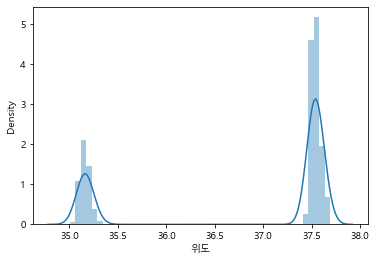

In [35]:
# 위도의 distplot 을 그립니다.
sns.distplot(df["위도"])

C:\Users\diqqo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='경도', ylabel='Density'>

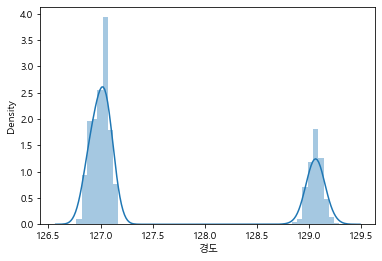

In [36]:
# 경도의 distplot 을 그립니다.
sns.distplot(df["경도"])

C:\Users\diqqo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='위도', ylabel='Density'>

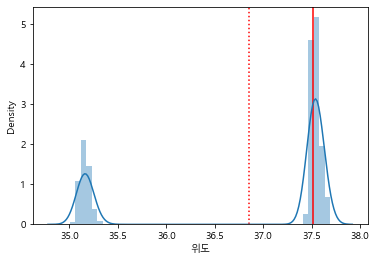

In [37]:
# 위도의 평균, 중앙값을 표현하고 color로 선의 색상을 linestyle 로 점선으로 표시해 봅니다.
plt.axvline(df["위도"].mean(), linestyle=":", color="r")
plt.axvline(df["위도"].median(), linestyle="-", color="r")
sns.distplot(df["위도"])

### 상관계수
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)
* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다.
* 결정계수(coefficient of determination) 는 r ** 2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="600">

이미지 출처 : [Correlation and dependence - Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence)

In [38]:
# 각 변수의 상관계수를 구합니다.
corr = df.corr()
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.057987,0.182678,-0.196658
건물본번지,0.057987,1.000000,0.000255,0.004606
경도,0.182678,0.000255,1.000000,-0.994711
위도,-0.196658,0.004606,-0.994711,1.000000


C:\Users\diqqo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\diqqo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

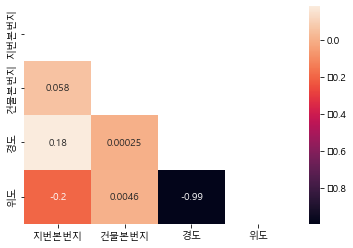

In [39]:
# 위에서 구한 상관계수를 시각화 합니다.
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask)

### 산점도로 이변량 수치형 변수 표현하기

<AxesSubplot:xlabel='경도', ylabel='위도'>

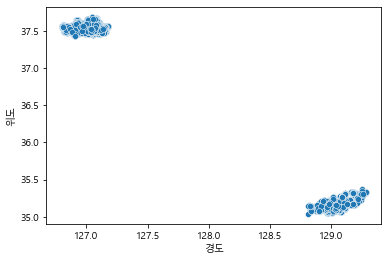

In [40]:
# scatterplot 으로 경도와 위도를 표현하며, 
# 데이터의 갯수가 많으면 오래 걸리기 때문에 1000 개의 샘플을 추출해서 그립니다.
sns.scatterplot(data=df.sample(10000), x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

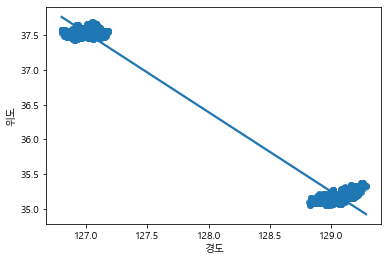

In [41]:
# 위 시각화에서 회귀선을 그립니다.
sns.regplot(data=df.sample(10000), x="경도", y="위도")

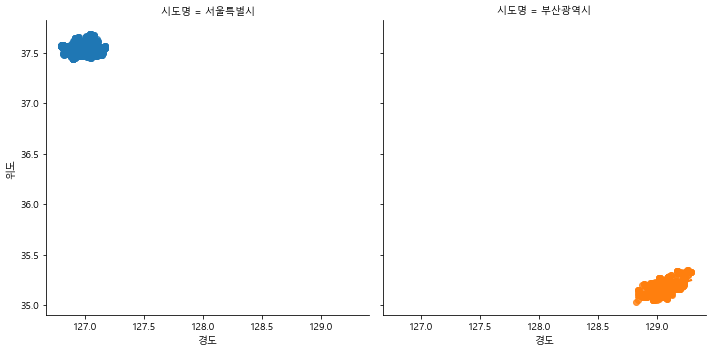

In [42]:
# 회귀선을 그리는 그래프의 서브플롯을 그립니다.
sns.lmplot(data=df.sample(10000), x="경도", y="위도", hue="시도명", col="시도명")

### object 타입의 데이터 요약하기

In [43]:
# include="object" 로 문자열 데이터에 대한 요약을 봅니다.
df.describe(include="object")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,573679,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680
unique,378758,9,94,709,2,39,629,648,2,190237,18001,190486
top,점프셈교실,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,부산광역시 부산진구 부전동 503-15,서울특별시 서초구 신반포로,부산광역시 부산진구 가야대로 772
freq,2297,185516,59725,38133,407376,47080,10400,12102,572913,1058,3543,1058


In [44]:
# 상권업종대분류명 의 요약값을 봅니다.
df["상권업종대분류명"].describe()

count     573680
unique         9
top           음식
freq      185516
Name: 상권업종대분류명, dtype: object

In [45]:
# 상권업종대분류명 의 unique 값을 봅니다.
df["상권업종대분류명"].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [46]:
# 상권업종대분류명 의 unique 값의 갯수를 세어봅니다.
df["상권업종대분류명"].nunique()

9

In [47]:
df["상권업종대분류명"].mode()

0    음식
dtype: object

### 범주형 변수의 빈도수 구하기

In [48]:
# value_counts 로 상권업종대분류명 의 빈도수를 구합니다.
df["상권업종대분류명"].value_counts()

음식          185516
소매          179460
생활서비스        97789
학문/교육        42477
의료           25509
부동산          20918
관광/여가/오락     16377
숙박            5327
스포츠            307
Name: 상권업종대분류명, dtype: int64

## 인덱싱과 필터로 서브셋 만들기

In [49]:
# "상권업종대분류명" 이 "음식인 데이터만 가져오기
# df_food 라는 변수에 담아줍니다. 서브셋을 새로운 변수에 저장할 때 copy()를 사용하는 것을 권장합니다.
df_food = df[df["상권업종대분류명"] =="음식"].copy()
df_food.head(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922


### 강남구의 상권업종대분류가 음식만 보기

In [50]:
# 시군구명이 "강남구" 인 데이터만 가져옵니다.
df[df["시군구명"] == "강남구"].copy().head(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922


In [51]:
# 이번에는 시군구명이 "강남구" 이고 "상권업종대분류명" 이 "음식"인 서브셋을 가져온 후 
# "상권업종중분류명" 별로 빈도수를 구합니다.
df[(df["시군구명"] =="강남구") & (df["상권업종대분류명"] =="음식")]["상권업종중분류명"].value_counts()

한식         4371
커피점/카페     2790
유흥주점       1573
양식         1573
일식/수산물     1255
분식         1197
패스트푸드       786
제과제빵떡케익     650
닭/오리요리      539
중식          358
별식/퓨전요리     341
부페           63
기타음식업        47
음식배달서비스      11
Name: 상권업종중분류명, dtype: int64

In [52]:
# 위와 똑같이 구하지만 이번에는 loc를 사용합니다.
# loc[행, 열]
df.loc[(df["시군구명"] =="강남구") & (df["상권업종대분류명"] =="음식"), "상권업종중분류명"].value_counts()

한식         4371
커피점/카페     2790
유흥주점       1573
양식         1573
일식/수산물     1255
분식         1197
패스트푸드       786
제과제빵떡케익     650
닭/오리요리      539
중식          358
별식/퓨전요리     341
부페           63
기타음식업        47
음식배달서비스      11
Name: 상권업종중분류명, dtype: int64

### 구별 음식점 업종 비교하기

In [53]:
# df_seoul_food 에 "시도명"이 "서울특별시" 이고 "상권업종대분류명" 이 "음식" 에 대한 서브셋만 가져와서 담아줍니다.
df_seoul_food = df[(df["시도명"]=="서울특별시") & (df["상권업종대분류명"] == "음식")].copy()
df_seoul_food.head(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922


In [54]:
# "시군구명", "상권업종중분류명" 으로 그룹화 해서 상점수를 세어봅니다.
# 결과를 food_gu 에 담아 재사용할 예정입니다.
food_gu = df_seoul_food.groupby(["시군구명", "상권업종중분류명"])["상호명"].count()
food_gu

시군구명  상권업종중분류명
강남구   기타음식업         47
      닭/오리요리       539
      별식/퓨전요리      341
      부페            63
      분식          1197
                  ... 
중랑구   제과제빵떡케익      160
      중식            78
      커피점/카페       311
      패스트푸드        127
      한식          1251
Name: 상호명, Length: 348, dtype: int64

<AxesSubplot:xlabel='상권업종중분류명'>

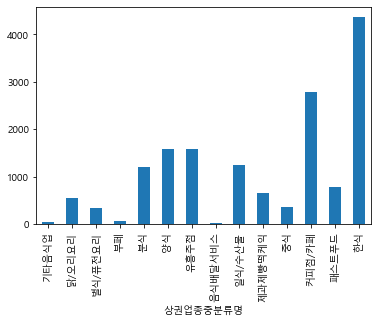

In [55]:
# food_gu 에 담긴 데이터를 시각화 합니다.
# 상권업종중분류명 과 상점수 로 barplot을 그립니다.
food_gu.unstack().loc["강남구"].plot.bar()

In [56]:
food = food_gu.reset_index()
food = food.rename(columns={"상호명":"상호수"})
food

,시군구명,상권업종중분류명,상호수
0,강남구,기타음식업,47
1,강남구,닭/오리요리,539
2,강남구,별식/퓨전요리,341
3,강남구,부페,63
4,강남구,분식,1197
...,...,...,...
343,중랑구,제과제빵떡케익,160
344,중랑구,중식,78
345,중랑구,커피점/카페,311
346,중랑구,패스트푸드,127


<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

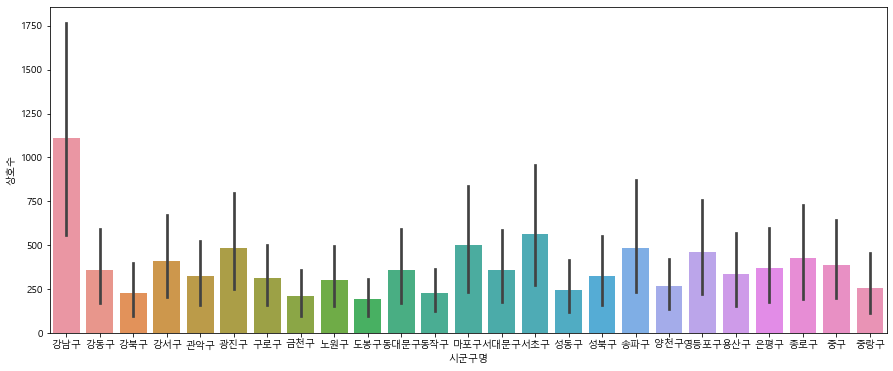

In [57]:
plt.figure(figsize=(15,6))
sns.barplot(data=food, x="시군구명", y="상호수")

* https://seaborn.pydata.org/tutorial/categorical.html

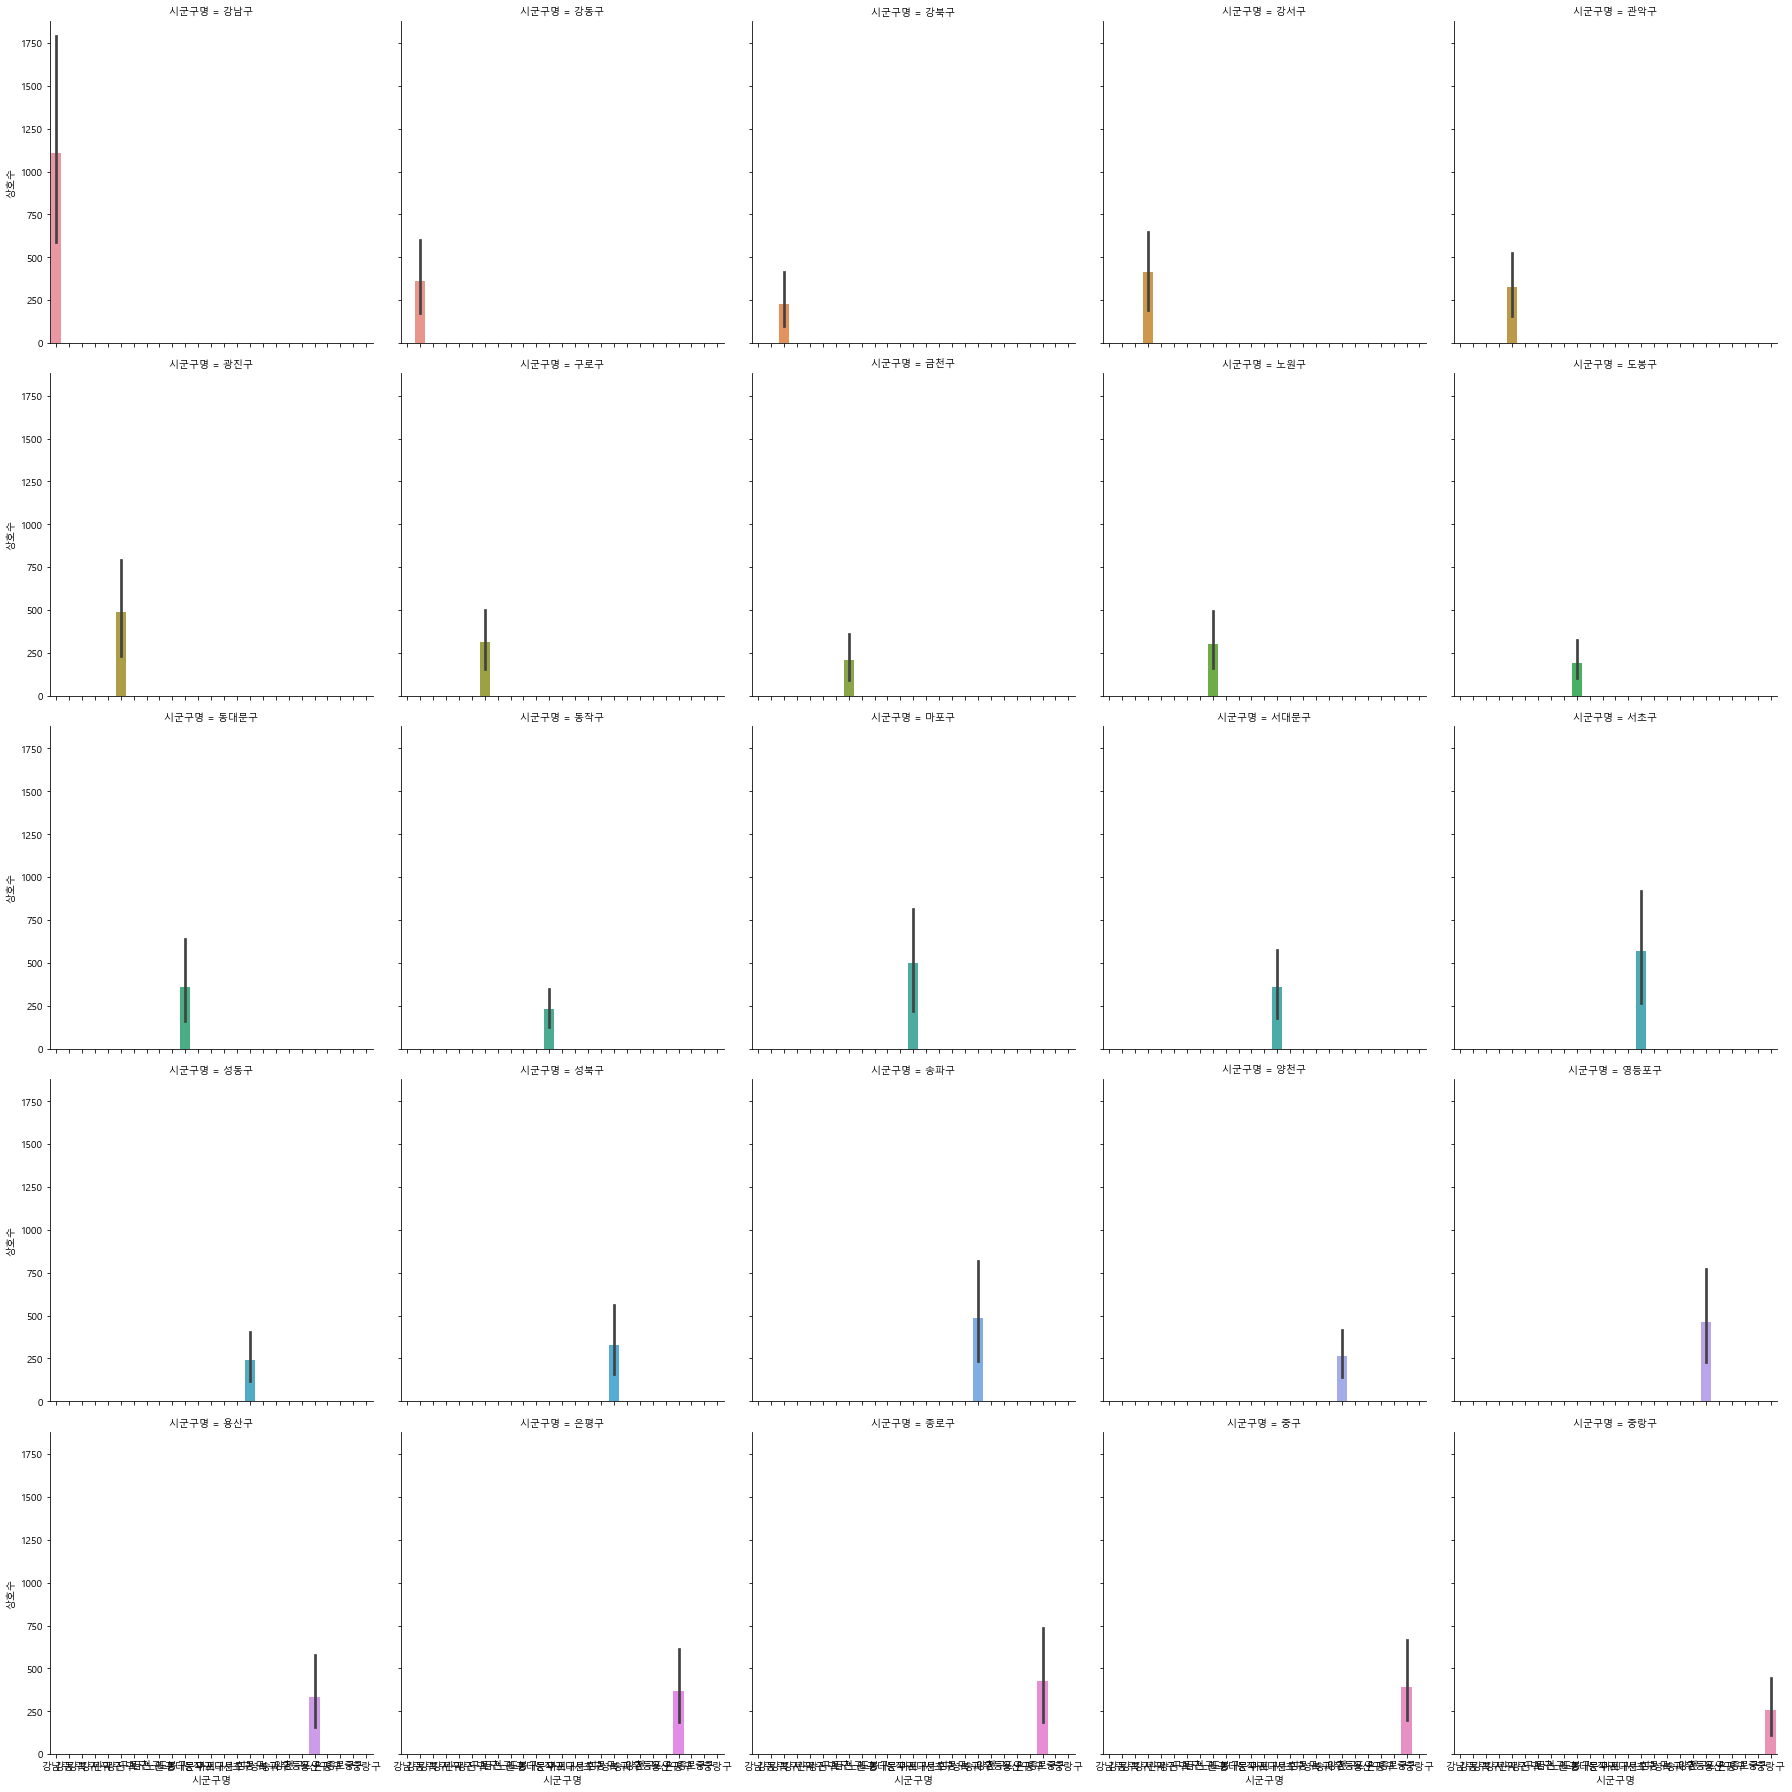

In [58]:
# catplot을 사용하여 서브프롯을 그립니다.
sns.catplot(data=food, x="시군구명", y="상호수", kind="bar", col="시군구명", col_wrap=5)

## 구별 학원수 비교
* 주거나 입지로 문화시설이나 학원, 교육 등을 고려하게 됩니다.
* 사교육이 발달한 지역으로 대치동이나 목동을 꼽는데 이 지역에 학원이 많이 분포 되어 있는지 알아봅니다.

### 서브셋 만들고 집계하기

In [95]:
# 학원의 분류명을 알아보기 위해 "상권업종대분류명"의 unique 값을 추출합니다.
df["상권업종대분류명"].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [108]:
# "시도명"이 "서울특별시"이고 "상권업종대분류명"이 "학문/교육" 인 데이터를 서브셋으로 가져옵니다.
# 재사용을 위해 서브셋을 df_academy 에 저장합니다.

df_academy = df[(df["시도명"]=="서울특별시") &(df["상권업종대분류명"] == "학문/교육")].copy()
df_academy.head(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
85,GIA보석교육원,학문/교육,학원-자격/국가고시,학원-보석감정,서울특별시,강남구,압구정동,신사동,대지,639,서울특별시 강남구 신사동 639-3,서울특별시 강남구 압구정로,320,서울특별시 강남구 압구정로 320,127.036437,37.528532


In [101]:
# df_academy 에서 "상호명"으로 빈도수를 구합니다.

df_academy["상호명"].value_counts()

점프셈교실        1659
해법수학           57
윤선생영어교실        34
뮤엠영어           27
해법영어교실         24
             ... 
이룸해법수학교습소       1
두꺼비철학관          1
수학사랑            1
류샘학원            1
아소비             1
Name: 상호명, Length: 24616, dtype: int64

In [102]:
# "시군구명" 으로 빈도수를 구합니다.

df_academy["시군구명"].value_counts()

강남구     4005
서초구     2103
양천구     1881
광진구     1848
송파구     1797
강동구     1585
노원구     1582
강서구     1498
은평구     1333
관악구     1313
성북구     1246
구로구     1140
동대문구    1051
동작구     1050
마포구     1007
영등포구     984
도봉구      931
중랑구      884
서대문구     773
성동구      742
금천구      701
종로구      638
강북구      513
용산구      491
중구       413
Name: 시군구명, dtype: int64

In [104]:
# "상권업종소분류명"으로 빈도수를 구하고 위에서 30개만 봅니다.

df_academy["상권업종소분류명"].value_counts().head(30)

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
학원-기타           677
태권도장            610
학습지보급           430
학원-어린이영어        319
컴퓨터학원           270
학원-스포츠/재즈댄스     269
학원-무용           220
놀이방             139
학원-주산암산부기속셈     122
유아교육기관기타        107
학원-미용           106
학원-배우/탤런트       102
합기도장             96
검도도장             95
실내놀이터-유아         84
학원-요리            78
학원-간호조무사         76
학원/국가고시          70
학원-사교춤           54
유도장              49
학원-심리변론          46
학원-국악            45
Name: 상권업종소분류명, dtype: int64

In [115]:
# "상권업종소분류명"으로 빈도수를 구하고
# 빈도수가 1000개 이상인 데이터만 따로 봅니다.

academy_count = df_academy["상권업종소분류명"].value_counts()
academy_count = academy_count[academy_count > 1000]
academy_count_1000 = academy_count
academy_count_1000

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: 상권업종소분류명, dtype: int64

In [123]:
# "시군구명", "상권업종소분류명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산합니다.

academy_groupby = df_academy.groupby(["시군구명", "상권업종소분류명"])["상호명"].count()
academy_groupby

시군구명  상권업종소분류명   
강남구   검도도장             9
      고시원            139
      놀이방              8
      독서실            125
      서예/서화/미술       219
                    ... 
중랑구   학원-입시          172
      학원-주산암산부기속셈      7
      학원-펜글씨/한문        1
      학원/국가고시          2
      합기도장             2
Name: 상호명, Length: 1118, dtype: int64

In [130]:
t = academy_groupby.reset_index()
t = t.rename(columns={"상호명": "상호수"})
t 

,시군구명,상권업종소분류명,상호수
0,강남구,검도도장,9
1,강남구,고시원,139
2,강남구,놀이방,8
3,강남구,독서실,125
4,강남구,서예/서화/미술,219
...,...,...,...
1113,중랑구,학원-입시,172
1114,중랑구,학원-주산암산부기속셈,7
1115,중랑구,학원-펜글씨/한문,1
1116,중랑구,학원/국가고시,2


### seaborn으로 시각화 하기

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

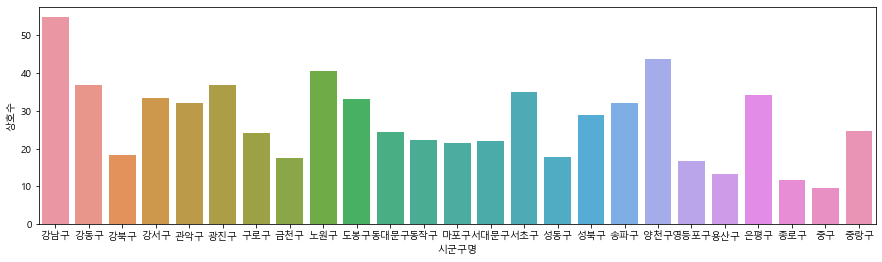

In [134]:
# 위에서 구한 결과를 시군구명, 상호수로 barplot을 그립니다.
plt.figure(figsize=(15,4))
sns.barplot(data=t, x="시군구명", y="상호수", ci=None)

###  isin 을 사용해 서브셋 만들기
* 상권업종소분류명을 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 봅니다.

In [143]:
# isin 으로 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 봅니다.
# 서브셋을 df_academy_selected 에 저장합니다.
df_academy_selected = df_academy[df_academy["상권업종소분류명"].isin(academy_count_1000.index)]
df_academy_selected

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
101,안재형영어,학문/교육,학원-어학,학원-외국어/어학,서울특별시,양천구,목5동,목동,대지,905,서울특별시 양천구 목동 905-34,서울특별시 양천구 목동서로,133,서울특별시 양천구 목동서로 133-2,126.875973,37.531592
121,정아트,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강서구,염창동,염창동,대지,184,서울특별시 강서구 염창동 184-8,서울특별시 강서구 양천로73가길,21,서울특별시 강서구 양천로73가길 21,126.873645,37.550924
134,아트인스튜디오,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강남구,역삼1동,역삼동,대지,818,서울특별시 강남구 역삼동 818-1,서울특별시 강남구 강남대로96길,12,서울특별시 강남구 강남대로96길 12,127.028054,37.499729
151,삼익피아노강동대리점,학문/교육,학원-음악미술무용,피아노/바이올린/기타,서울특별시,강동구,천호3동,천호동,대지,410,서울특별시 강동구 천호동 410-105,서울특별시 강동구 진황도로,18,서울특별시 강동구 진황도로 18,127.129075,37.539262
153,파랑새어린이집,학문/교육,유아교육,어린이집,서울특별시,도봉구,창1동,창동,대지,374,서울특별시 도봉구 창동 374,서울특별시 도봉구 덕릉로,329,서울특별시 도봉구 덕릉로 329,127.045486,37.644831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573529,쌤통수학교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,서대문구,홍제2동,홍제동,대지,106,서울특별시 서대문구 홍제동 106,서울특별시 서대문구 통일로34길,24,서울특별시 서대문구 통일로34길 24,126.949389,37.585709
573654,골든벨독서실,학문/교육,도서관/독서실,독서실,서울특별시,양천구,신월2동,신월동,대지,447,서울특별시 양천구 신월동 447-5,서울특별시 양천구 월정로,56,서울특별시 양천구 월정로 56,126.841706,37.524719
573656,에이디링크연구소,학문/교육,학원기타,학원(종합),서울특별시,송파구,가락본동,가락동,대지,76,서울특별시 송파구 가락동 76,서울특별시 송파구 양재대로62길,47,서울특별시 송파구 양재대로62길 47,127.120757,37.495986
573661,도무스링구아,학문/교육,학원-보습교습입시,학원-입시,서울특별시,서초구,양재1동,우면동,대지,721,서울특별시 서초구 우면동 721-1,서울특별시 서초구 태봉로,70,서울특별시 서초구 태봉로 70,127.025571,37.464531


In [145]:
# df_academy_selected 의 "시군구명"으로 빈도수를 셉니다.

9df_academy_selected["시군구명"].value_counts()

강남구     3410
서초구     1732
양천구     1706
광진구     1536
송파구     1484
노원구     1425
강서구     1288
강동구     1255
은평구     1162
관악구     1115
성북구     1066
구로구      987
동작구      877
동대문구     863
마포구      857
도봉구      849
영등포구     775
중랑구      745
서대문구     656
성동구      642
금천구      568
종로구      479
강북구      444
용산구      395
중구       314
Name: 시군구명, dtype: int64

In [147]:
df_academy_selected[df_academy_selected["법정동명"] =="대치동"]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
195,삼성수학,학문/교육,학원-보습교습입시,학원-입시,서울특별시,강남구,대치2동,대치동,대지,975,서울특별시 강남구 대치동 975-16,서울특별시 강남구 삼성로64길,27,서울특별시 강남구 삼성로64길 27,127.062607,37.500441
1079,웹타임교육센터,학문/교육,학원기타,학원(종합),서울특별시,강남구,대치4동,대치동,대지,891,서울특별시 강남구 대치동 891-44,서울특별시 강남구 테헤란로78길,16,서울특별시 강남구 테헤란로78길 16,127.055322,37.505050
2725,창의융합과학원,학문/교육,학원-보습교습입시,학원-입시,서울특별시,강남구,대치2동,대치동,대지,50,서울특별시 강남구 대치동 50-8,서울특별시 강남구 영동대로,202,서울특별시 강남구 영동대로 202,127.069986,37.497273
3086,레드매쓰,학문/교육,학원-보습교습입시,학원-입시,서울특별시,강남구,대치2동,대치동,대지,986,서울특별시 강남구 대치동 986-6,서울특별시 강남구 도곡로,531,서울특별시 강남구 도곡로 531,127.064463,37.500320
3210,이주성과학,학문/교육,학원-보습교습입시,학원-입시,서울특별시,강남구,대치2동,대치동,대지,990,서울특별시 강남구 대치동 990-2,서울특별시 강남구 도곡로,522,서울특별시 강남구 도곡로 522,127.063558,37.499457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565965,컬러코드문화연구소,학문/교육,학원기타,학원(종합),서울특별시,강남구,대치1동,대치동,대지,1014,서울특별시 강남구 대치동 1014-3,서울특별시 강남구 도곡로78길,22,서울특별시 강남구 도곡로78길 22,127.058832,37.496626
566936,가이아연구소,학문/교육,학원기타,학원(종합),서울특별시,강남구,대치4동,대치동,대지,933,서울특별시 강남구 대치동 933-23,서울특별시 강남구 삼성로61길,34,서울특별시 강남구 삼성로61길 34,127.057662,37.498815
567506,스펙터영어교습소,학문/교육,학원-어학,학원-외국어/어학,서울특별시,강남구,대치1동,대치동,대지,1014,서울특별시 강남구 대치동 1014-2,서울특별시 강남구 삼성로57길,39,서울특별시 강남구 삼성로57길 39,127.058056,37.497161
570184,대치동캐슬유튜브센터,학문/교육,학원-보습교습입시,학원-입시,서울특별시,강남구,대치4동,대치동,대지,911,서울특별시 강남구 대치동 911-28,서울특별시 강남구 역삼로,446,서울특별시 강남구 역삼로 446,127.055847,37.502000


In [149]:
df_academy_selected.loc[df_academy_selected["법정동명"] =="대치동", "상권업종소분류명"].value_counts()

학원-입시          831
학원-외국어/어학      281
학원(종합)         211
서예/서화/미술       113
피아노/바이올린/기타     60
독서실             42
고시원             30
어린이집            16
Name: 상권업종소분류명, dtype: int64

In [150]:
df_academy_selected.loc[df_academy_selected["법정동명"] =="목동", "상권업종소분류명"].value_counts()

학원-입시          375
학원-외국어/어학      152
학원(종합)          88
어린이집            61
피아노/바이올린/기타     41
서예/서화/미술        39
독서실             22
고시원              7
Name: 상권업종소분류명, dtype: int64

In [155]:
# df_academy_selected 로 위에서 했던 그룹화를 복습해 봅니다.
# "상권업종소분류명", "시군구명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산합니다.
# g 라는 변수에 담아 재사용 할 예정입니다.
g= df_academy_selected.groupby(["상권업종소분류명","시군구명"])["상호명"].count()
g

상권업종소분류명  시군구명
고시원       강남구     139
          강동구      62
          강북구      11
          강서구      32
          관악구      83
                 ... 
학원-입시     용산구      70
          은평구     337
          종로구      75
          중구       59
          중랑구     172
Name: 상호명, Length: 200, dtype: int64

### Pandas 의 plot 으로 시각화

<AxesSubplot:ylabel='시군구명'>

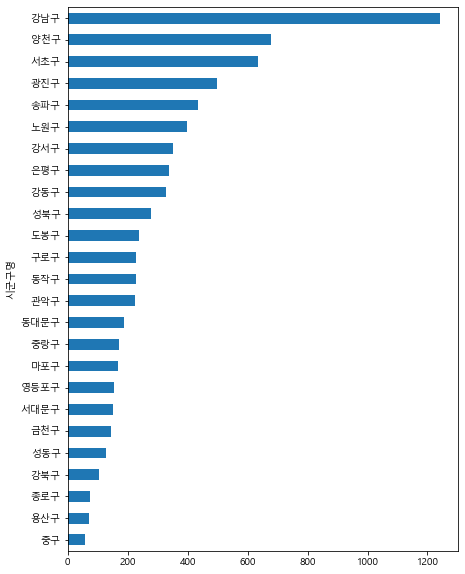

In [168]:
# 상권업종소분류명이 index 로 되어 있습니다.
# loc를 통해 index 값을 가져올 수 있습니다.
# 그룹화된 결과 중 "학원-입시" 데이터만 가져옵니다. 
g.loc["학원-입시"].sort_values().plot.barh(figsize=(7,10))

### unstack() 이해하기
* https://pandas.pydata.org/docs/user_guide/reshaping.html
<img src="https://pandas.pydata.org/docs/_images/reshaping_stack.png">
<img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png">

In [171]:
# 위에서 그룹화한 데이터를 unstack() 하고 iloc로 위에서 5개 왼쪽에서 5개만 서브셋을 봅니다.

g.unstack().iloc[:5, :5]

시군구명,강남구,강동구,강북구,강서구,관악구
상권업종소분류명,,,,,
고시원,139,62,11,32,83
독서실,125,46,14,60,69
서예/서화/미술,219,110,19,70,72
어린이집,189,210,112,262,220
피아노/바이올린/기타,266,189,47,150,139


<AxesSubplot:ylabel='상권업종소분류명'>

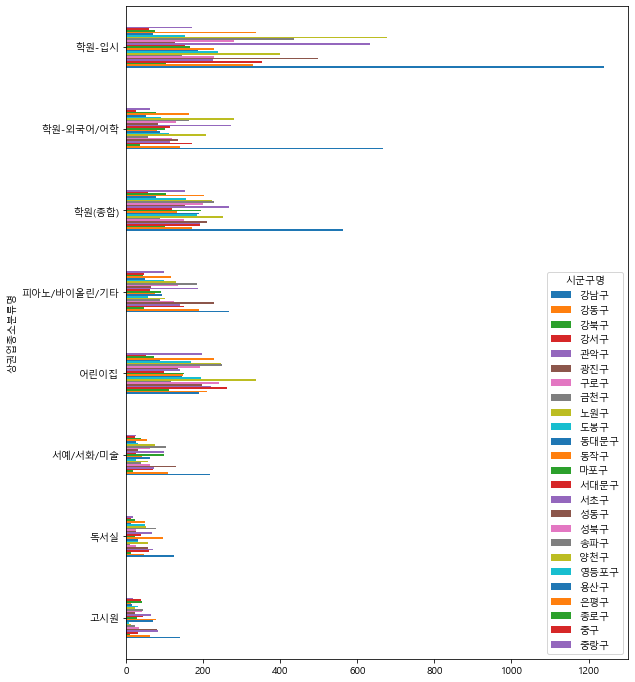

In [181]:
# 그룹화된 결과에 unstack 을 사용하면 마지막 인덱스 컬럼이 컬럼으로 바뀝니다.
g.unstack().plot.barh(figsize=(9,12))

<AxesSubplot:xlabel='시군구명'>

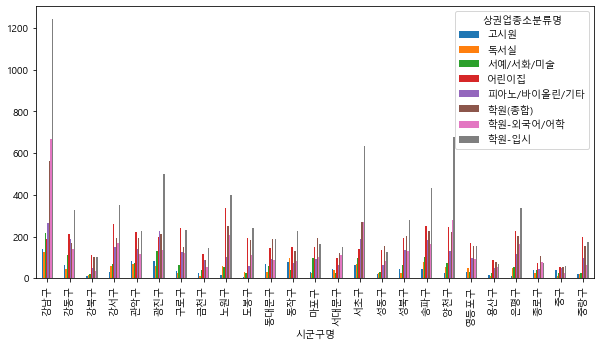

In [184]:
# 구별로 학원 수 시각화 하기 unstack() 값에 transpose 를 하면 행과 열이 바뀝니다.

g.unstack().T.plot.bar(figsize=(10,5))

In [185]:
# 그룹화 한 값의 인덱스를 출력해 봅니다.
g.index

MultiIndex([(  '고시원',  '강남구'),
            (  '고시원',  '강동구'),
            (  '고시원',  '강북구'),
            (  '고시원',  '강서구'),
            (  '고시원',  '관악구'),
            (  '고시원',  '광진구'),
            (  '고시원',  '구로구'),
            (  '고시원',  '금천구'),
            (  '고시원',  '노원구'),
            (  '고시원',  '도봉구'),
            ...
            ('학원-입시',  '성동구'),
            ('학원-입시',  '성북구'),
            ('학원-입시',  '송파구'),
            ('학원-입시',  '양천구'),
            ('학원-입시', '영등포구'),
            ('학원-입시',  '용산구'),
            ('학원-입시',  '은평구'),
            ('학원-입시',  '종로구'),
            ('학원-입시',   '중구'),
            ('학원-입시',  '중랑구')],
           names=['상권업종소분류명', '시군구명'], length=200)

In [190]:
# 멀티인덱스보다 컬럼으로 접근이 편하기 때문에 reset_index 를 통해 인덱스값을 컬럼으로 만들어 줍니다.
# "상호명" 컬럼은 "상호수" 이기 때문에 컬럼명을 변경해 줍니다.
t = g.reset_index()
t= t.rename(columns={"상호명":"상호수"})
t

,상권업종소분류명,시군구명,상호수
0,고시원,강남구,139
1,고시원,강동구,62
2,고시원,강북구,11
3,고시원,강서구,32
4,고시원,관악구,83
...,...,...,...
195,학원-입시,용산구,70
196,학원-입시,은평구,337
197,학원-입시,종로구,75
198,학원-입시,중구,59


### 같은 그래프를 seaborn 으로 그리기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png">

이미지 출처 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

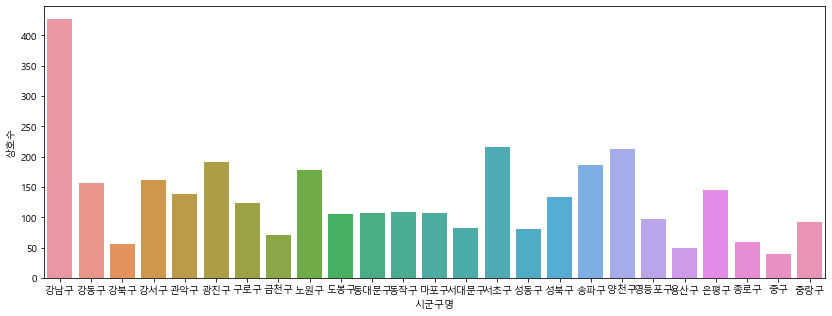

In [194]:
# x축에 시군구명을 y축에 상호수를 막대그래프로 그립니다. 
# 상권업종소분류명 으로 색상을 다르게 표현합니다.
plt.figure(figsize=(14,5))
sns.barplot(data=t, x="시군구명", y="상호수", ci=None)

<AxesSubplot:xlabel='상권업종소분류명', ylabel='상호수'>

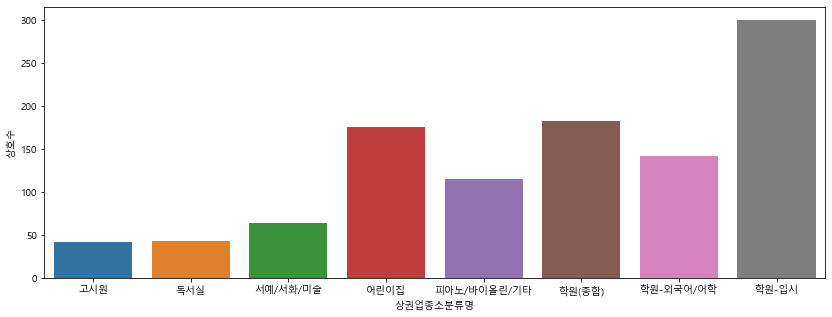

In [196]:
# x축에 상권업종소분류명을 y축에 상호수를 막대그래프로 그립니다. 
# 시군구명 으로 색상을 다르게 표현합니다.
plt.figure(figsize=(14,5))
sns.barplot(data=t, x="상권업종소분류명", y="상호수", ci=None)

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

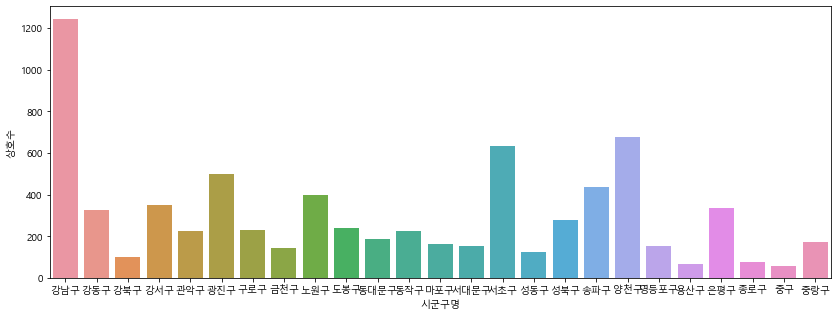

In [205]:
# "상권업종소분류명"이 "학원-입시" 인 서브셋만 가져와서 시각화 합니다.
plt.figure(figsize=(14,5))
academy_sub = t[t["상권업종소분류명"] == "학원-입시"].copy()
sns.barplot(data=academy_sub, x="시군구명", y="상호수", ci=None)

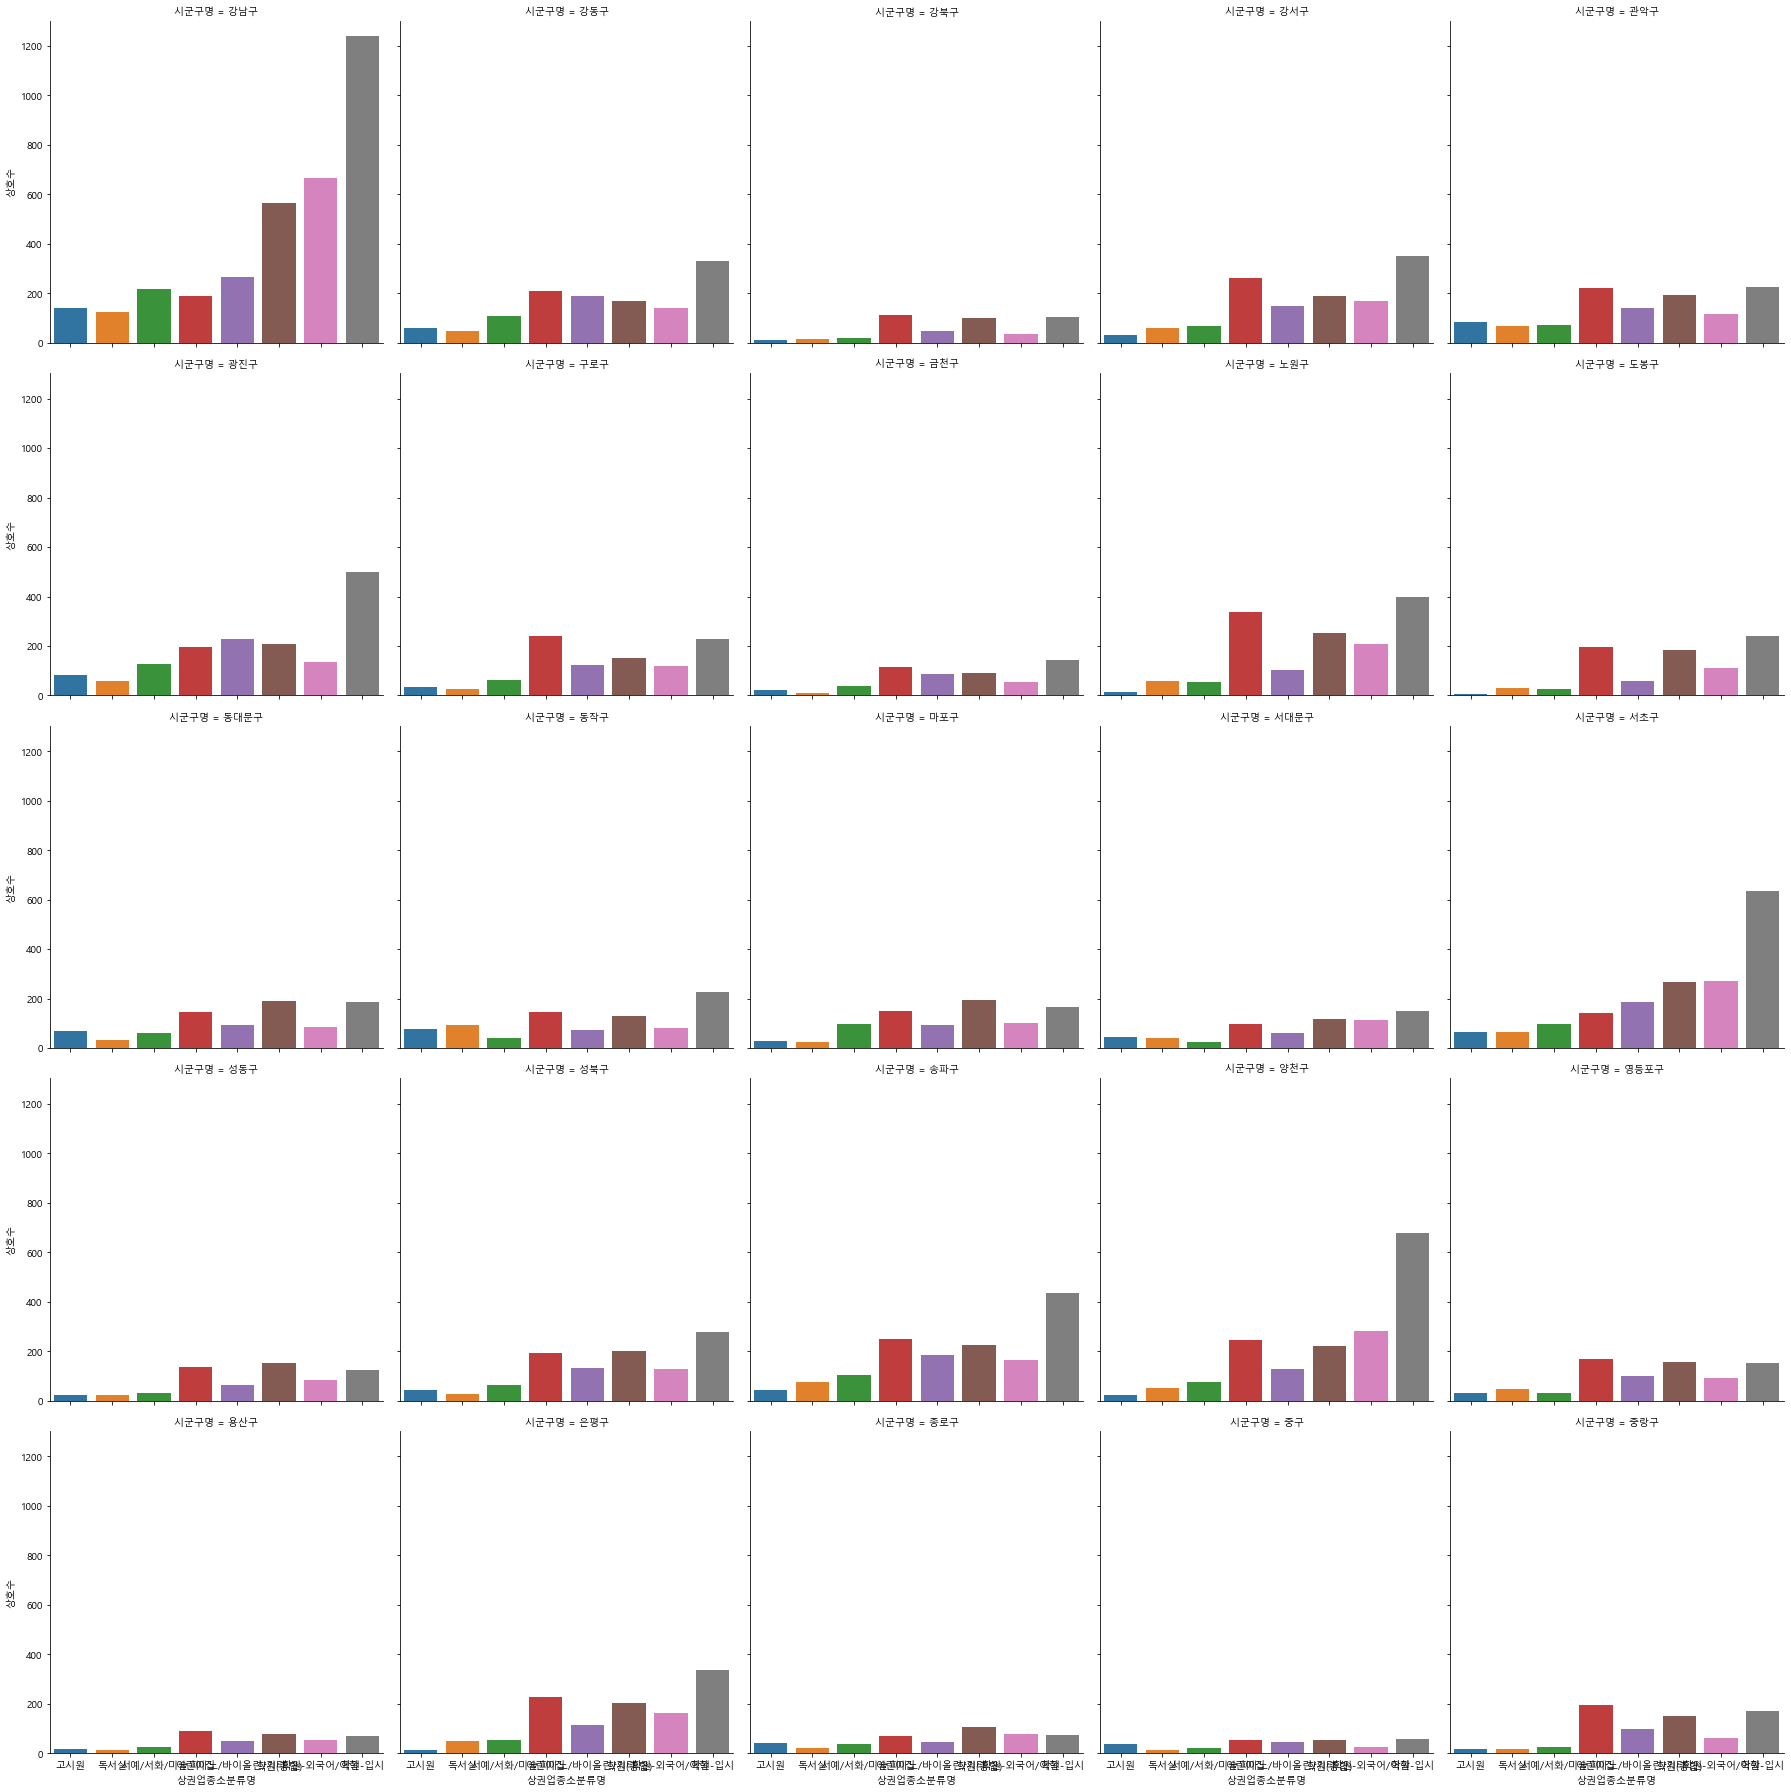

In [212]:
# catplot을 통해 서브플롯을 그립니다.

sns.catplot(data=t, x="상권업종소분류명", y="상호수", kind="bar", col="시군구명", col_wrap=5)

### 경도와 위도를 scatterplot 으로 표현하기

<AxesSubplot:xlabel='경도', ylabel='위도'>

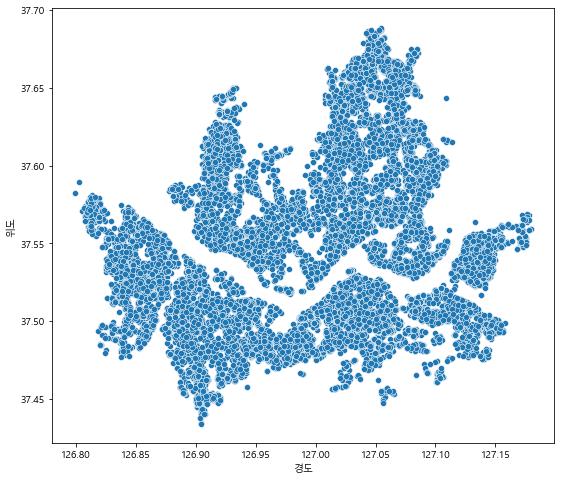

In [216]:
# scatterplot 으로 경도와 위도를 표현하고 시군구명으로 색상을 다르게 표현합니다.
plt.figure(figsize=(9,8))
sns.scatterplot(data= df_academy_selected, x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

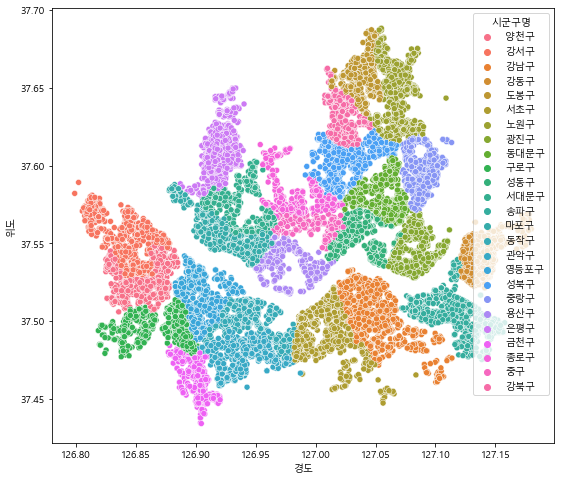

In [220]:
# scatterplot 으로 경도와 위도를 표현하고 상권업종소분류명으로 색상을 다르게 표현합니다.
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_academy_selected, x="경도", y="위도", hue="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

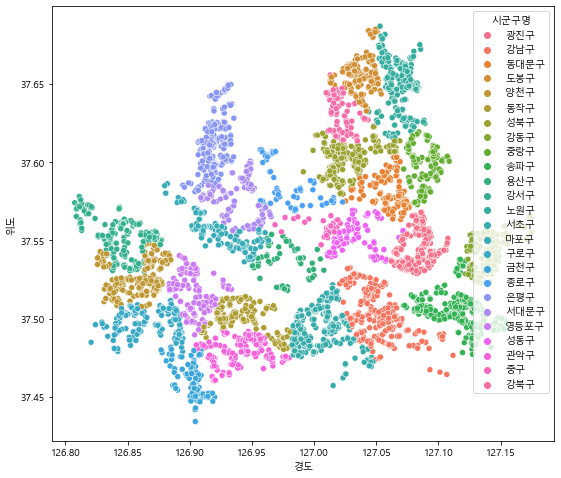

In [222]:
# "상권업종소분류명"이 "학원-입시" 인 데이터만 그려봅니다.
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"] == "학원-입시"],
                x="경도", y="위도", hue="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

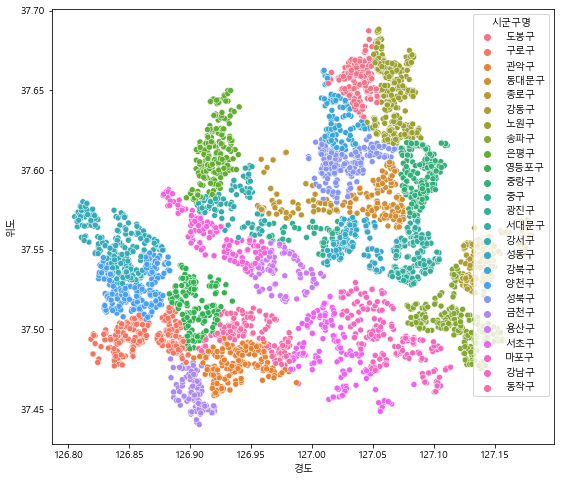

In [223]:
# "상권업종소분류명"이 "어린이집" 인 데이터만 그려봅니다.
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"] == "어린이집"],
                x="경도", y="위도", hue="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

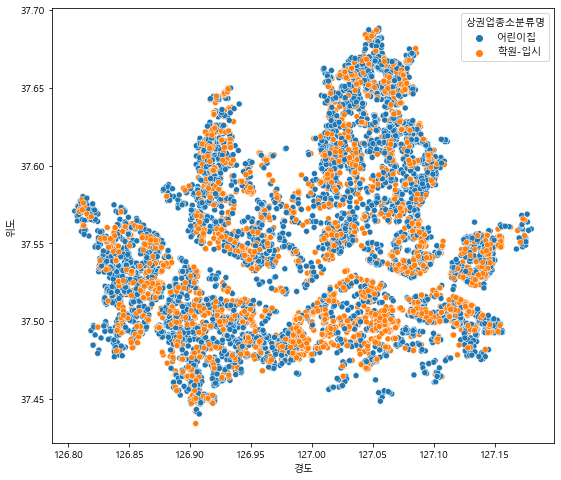

In [225]:
# 어린이집과 학원-입시를 비교해 봅니다.
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])],
                x="경도", y="위도", hue="상권업종소분류명")

## Folium 으로 지도 활용하기
아나콘다를 설치하게 되면 자주 사용되는 패키지와 라이브러리가 함께 설치 됩니다.
아나콘다를 사용하지 않는다면 이런 라이브러리를 따로 설치하고 의존성있는 버전을 일일이 맞춰주어야 합니다.
아나콘다는 기본적으로 자주 사용되는 판다스, 넘파이, 사이킷런, 맷플롯립 등의 라이브러리를 내장하고 있습니다.
이에 비해 missingno, folium 등의 라이브러리는 아나콘다에 포함되어 있지 않습니다.
그래서 따로 설치를 해서 사용합니다.


* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`


### Folium 사용예제
* 예제목록 : http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/
* Quickstart : https://nbviewer.jupyter.org/github/python-visualization/folium/blob/main/examples/Quickstart.ipynb

In [226]:
# 위에서 그렸던 어린이집과 학원-입시에 대한 상호 데이터를 지도에 시각화 해봅니다.
import folium

In [232]:
long = df_academy_selected["경도"].mean()
lat = df_academy_selected["위도"].mean()

In [240]:
df_m = df_academy_selected[df_academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])]
df_m = df_m.sample(1000)
df_m.shape

(1000, 16)

In [243]:
# 경도와 위도의 평균을 구해서 long, lat 변수에 담습니다.
m = folium.Map(location=[lat, long], zoom_start=12)

folium.Marker(
    [37.5545, 126.867], tooltip="해법수학").add_to(m)

m

In [245]:
for i in df_m.index[:10]:
    tooltip = df_m.loc[i,"상호명"] + "-" + df_m.loc[i, "도로명주소"]
    lat = df_m.loc[i,"위도"]
    long = df_m.loc[i,"경도"]
    
    print(tooltip, lat, long)

힘찬어린이집-서울특별시 서대문구 증가로 214-1 37.5810655551014 126.915217535226
2014세계수학자대회조직위원회-서울특별시 강남구 테헤란로7길 22 37.5007148214433 127.030721483725
큰당성어린이집-서울특별시 영등포구 영등포로25길 23-19 37.5231337015573 126.897266093365
다비오수학보습학원-서울특별시 서초구 태봉로 70 37.4645310346132 127.025570605719
뮤엠영어송화캠퍼스-서울특별시 강서구 방화대로34길 73 37.5706948752354 126.820358304041
고수수학보습학원-서울특별시 강동구 동남로67길 36 37.5488581145966 127.153804615238
조원상의생각펼치기국어교-서울특별시 도봉구 시루봉로2길 90 37.6550630597222 127.032855154036
시그마수학교습소-서울특별시 성북구 종암로 19 37.5920983487607 127.036127779666
전문가집단-서울특별시 강남구 도곡로 408 37.496615204091 127.055213389641
해맑은KIDS어린이집-서울특별시 은평구 역말로 131 37.6107579135787 126.921480188428


In [252]:
m = folium.Map(location=[lat, long], zoom_start=12, tiles="Stamen Toner")

for i in df_m.index:
    tooltip = df_m.loc[i,"상호명"] + "-" + df_m.loc[i, "도로명주소"]
    lat = df_m.loc[i,"위도"]
    long = df_m.loc[i,"경도"]

    folium.CircleMarker([lat, long], tooltip=tooltip, radius=5).add_to(m)
m